In [458]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import glob
import random
from random import shuffle
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
import os
import pickle
from collections import deque
from feature_extraction_classification import *

# Look at some HOG transforms

# Gray Scale Visualization of HOG (using default parameters )

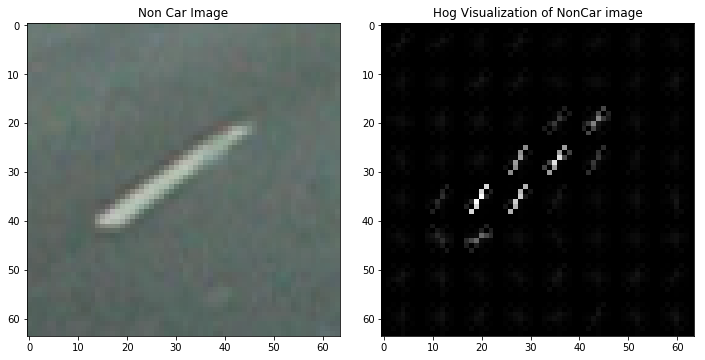

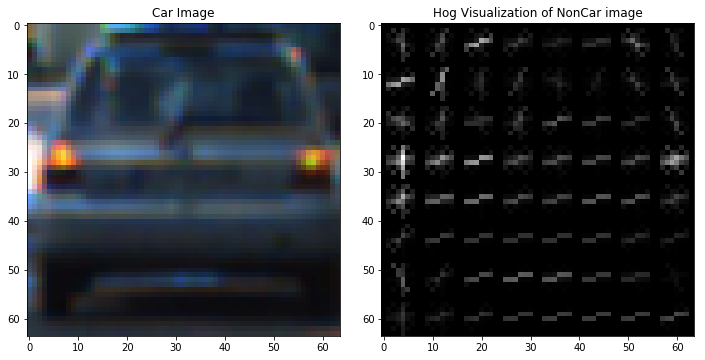

In [5]:
rand_non_car_filename = random.choice(glob.glob('non-vehicles/*/*.png'))
rand_car_filename = random.choice(glob.glob('vehicles/*/*.png'))
nocar_img = mpimg.imread(rand_non_car_filename)
grayscale_nocar = convert_color(nocar_img,'GRAY')
car_img = mpimg.imread(rand_car_filename)
grayscale_car = convert_color(car_img,'GRAY')

hog_noncar_features, hog_noncar_image = get_hog_features( grayscale_nocar,vis=True)
hog_car_features, hog_car_image = get_hog_features(grayscale_car,vis=True)

# Plot the examples
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(nocar_img)
ax1.set_title('Non Car Image')
ax2.imshow(hog_noncar_image, cmap='gray')
ax2.set_title('Hog Visualization of NonCar image')
plt.savefig('submission_images/Car_hog_visualization.png',bbox_inches='tight')
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(car_img)
ax1.set_title('Car Image')
ax2.imshow(hog_car_image, cmap='gray')
ax2.set_title('Hog Visualization of NonCar image')

plt.savefig('submission_images/Non-car_hog_visualization.png',bbox_inches='tight')
plt.show()

# Visualization of color feature

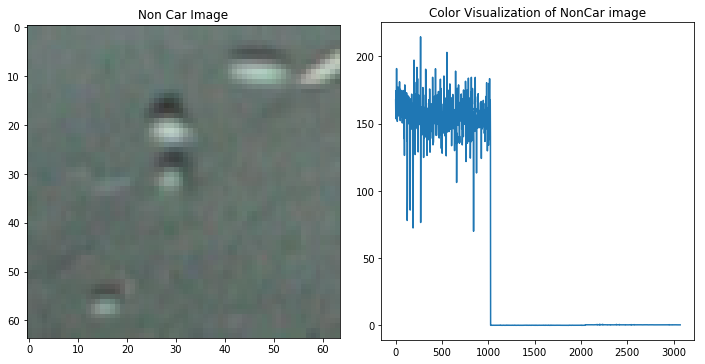

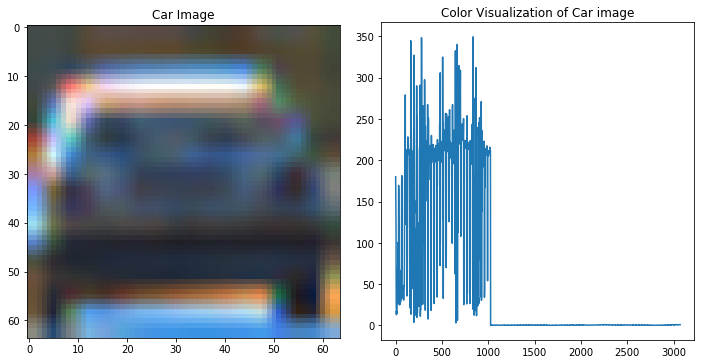

In [14]:
rand_non_car_filename_2 = random.choice(glob.glob('non-vehicles/*/*.png'))
rand_car_filename_2 = random.choice(glob.glob('vehicles/*/*.png'))
nocar_img_2 = mpimg.imread(rand_non_car_filename_2)
car_img_2 = mpimg.imread(rand_car_filename_2)

color_noncar_conv_img = convert_color(nocar_img_2,'HSV')
color_noncar = bin_spatial(color_noncar_conv_img)

color_car_conv_img = convert_color(car_img_2,'HSV')
color_car = bin_spatial(color_car_conv_img)

# Plot the examples
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(nocar_img_2)
ax1.set_title('Non Car Image')
ax2.plot(color_noncar)
ax2.set_title('Color Visualization of NonCar image')
plt.savefig('submission_images/Car_color_visualization.png',bbox_inches='tight')
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(car_img_2)
ax1.set_title('Car Image')
ax2.plot(color_car)
ax2.set_title('Color Visualization of Car image')
plt.savefig('submission_images/non-Car_color_visualization.png',bbox_inches='tight')

plt.show()

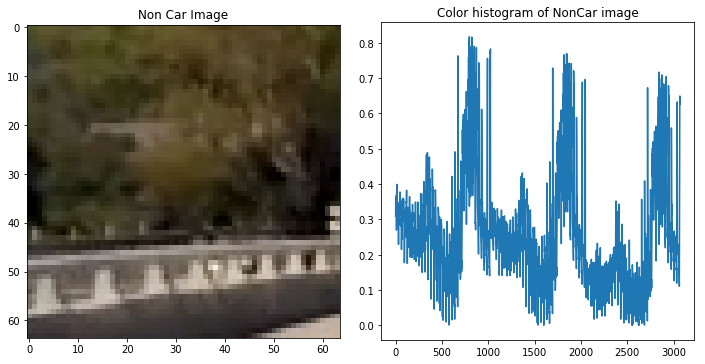

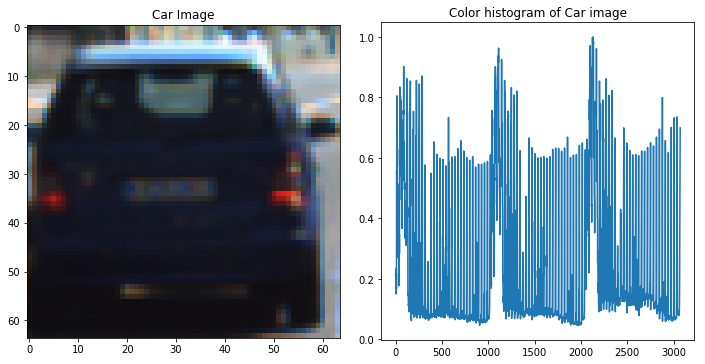

In [9]:
rand_non_car_filename_3 = random.choice(glob.glob('non-vehicles/*/*.png'))
rand_car_filename_3 = random.choice(glob.glob('vehicles/*/*.png'))
nocar_img_3 = mpimg.imread(rand_non_car_filename_3)
car_img_3 = mpimg.imread(rand_car_filename_3)

color_hist_noncar = bin_spatial(nocar_img_3)
color_hist_car = bin_spatial(car_img_3)

# Plot the examples
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(nocar_img_3)
ax1.set_title('Non Car Image')
ax2.plot(color_hist_noncar)
ax2.set_title('Color histogram of NonCar image')

plt.savefig('submission_images/non-Car_color_hist_visualization.png',bbox_inches='tight')
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(car_img_3)
ax1.set_title('Car Image')
ax2.plot(color_hist_car)
ax2.set_title('Color histogram of Car image')

plt.savefig('submission_images/Car_color_hist_visualzation.png',bbox_inches='tight')
plt.show()

# Build generic Classifier

In [291]:
list_car_img_filename = glob.glob('vehicles/*/*.png')
list_noncar_img_filename = glob.glob('non-vehicles/*/*.png')
list_cars_images = []
list_noncar_images = []
for im in list_car_img_filename:
    list_cars_images.append(im)
    
for im in list_noncar_img_filename:
    list_noncar_images.append(im)
print("Total number of Car images ={0}, and non Car images = {1}".format(len(list_cars_images), len(list_noncar_images)))

sample_size = len(list_noncar_images)
#sample_size = 500
shuffle(list_cars_images)
shuffle(list_noncar_images)
list_cars_image_sample = list_cars_images[0:sample_size]
list_noncars_image_sample = list_noncar_images[0:sample_size]


Total number of Car images =8792, and non Car images = 8968


In [15]:
scaler, classifier, bin_spatial_acc= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                      list_noncars_image_sample,
                                                                      colorspace='RGB2YCrCb',
                                                                     bin_spatial_feat=True,
                                                                     color_hist_feat=True, 
                                                                     hog_feature=False,
                                                                    hog_features_lists ={}
                                                                     )
print("Accuracy based off color feature={0}".format(bin_spatial_acc))

Accuracy based off color feature=0.895


In [16]:
hog_features_lists ={}
hog_features_lists ['hog_channels'] = 'ALL'
hog_features_lists ['orient'] = 9
hog_features_lists ['pixels_per_cell'] = 8
hog_features_lists ['cells_per_block'] = 2
shuffle(list_cars_image_sample)
shuffle(list_noncars_image_sample)
color_scaler, classifier, hog_only_acc= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                  list_noncars_image_sample,
                                                                  colorspace='RGB2YCrCb',
                                                                 bin_spatial_feat=False,
                                                                 color_hist_feat=False, 
                                                                 hog_feature=True,
                                                                hog_features_lists = hog_features_lists
                                                                 )
print("Accuracy based off hog only feature={0}".format(hog_only_acc))

Accuracy based off hog only feature=0.95


# Analyze classifier accuracy based on color distribution

In [23]:
color_list = ['HLS', 'HSV', 'RGB2YCrCb', 'BGR2YCrCb']
for color in color_list:
    hog_features_lists ={}
    hog_features_lists ['hog_channels'] = 'ALL'
    hog_features_lists ['orient'] = 9
    hog_features_lists ['pixels_per_cell'] = 8
    hog_features_lists ['cells_per_block'] = 2
    shuffle(list_cars_image_sample)
    shuffle(list_noncars_image_sample)
    color_scaler, classifier, acc= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                      list_noncars_image_sample,
                                                                      colorspace=color,
                                                                     bin_spatial_feat=False,
                                                                     color_hist_feat=False, 
                                                                     hog_feature=True,
                                                                    hog_features_lists = hog_features_lists
                                                                     )
    print("Color = {0}, Accuracy={1}".format(color, acc))

Color = HLS, Accuracy=0.9485
Color = HSV, Accuracy=0.9507
Color = RGB2YCrCb, Accuracy=0.9623
Color = BGR2YCrCb, Accuracy=0.9578


# Analyze classifier accuracy based on color histogram

# Find best hog channel keeping rest of them fixed.
Color = 'RGB2YCrCb', orientation = 9, pixels_per_block =2, cells_per_block=2
Hog channels can be 0 , 1, 2 or ALL

In [24]:
hog_channel_list = [0,1,2,'ALL']

for hog_channel in hog_channel_list:
    hog_features_lists ={}
    hog_features_lists ['hog_channels'] = hog_channel
    hog_features_lists ['orient'] = 9
    hog_features_lists ['pixels_per_cell'] = 8
    hog_features_lists ['cells_per_block'] = 2
    shuffle(list_cars_image_sample)
    shuffle(list_noncars_image_sample)
    scaler, classifier, acc_channel= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                              list_noncars_image_sample,
                                                                              colorspace='BGR2YCrCb',
                                                                             bin_spatial_feat=False,
                                                                             color_hist_feat=False, 
                                                                             hog_feature=True,
                                                                            hog_features_lists = hog_features_lists
                                                                             )
    print("HOG Channel = {0}, Accuracy={1}".format(hog_channel, acc_channel))

HOG Channel = 0, Accuracy=0.9181
HOG Channel = 1, Accuracy=0.8995
HOG Channel = 2, Accuracy=0.9215
HOG Channel = ALL, Accuracy=0.9651


# Try different orientation

In [25]:
orient_exp_list = [5,9,11,15]
for orient_exp in orient_exp_list:
    hog_features_lists ={}
    hog_features_lists ['hog_channels'] = 'ALL'
    hog_features_lists ['orient'] = orient_exp
    hog_features_lists ['pixels_per_cell'] = 2
    hog_features_lists ['cells_per_block'] = 2
    file_name ='orient_feature_acc' + str(orient_exp) + '.p'
    if os.path.isfile(file_name):
        acc_orient = pickle.load( open( file_name, "rb" ) )
    else:
        scaler, classifier, acc_orient= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                      list_noncars_image_sample,
                                                                      colorspace='BGR2YCrCb',
                                                                     bin_spatial_feat=False,
                                                                     color_hist_feat=False, 
                                                                     hog_feature=True,
                                                                    hog_features_lists = hog_features_lists
                                                                     )

        pickle.dump(acc_orient, open( file_name, "wb" ) )
    
    print("Num of Orientation = {0}, Accuracy={1}".format(orient_exp, acc_orient))

Num of Orientation = 5, Accuracy=0.945
Num of Orientation = 9, Accuracy=0.925
Num of Orientation = 11, Accuracy=0.965
Num of Orientation = 15, Accuracy=0.915


In [26]:
pixels_list = [4,6,8,12]
for pixels_val in pixels_list:
    hog_features_lists ={}
    hog_features_lists ['hog_channels'] = 'ALL'
    hog_features_lists ['orient'] = 11
    hog_features_lists ['pixels_per_cell'] = pixels_val
    hog_features_lists ['cells_per_block'] = 2
    shuffle(list_cars_image_sample)
    shuffle(list_noncars_image_sample)
    file_name ='pixel_feature_acc' + str(pixels_val) + '.p'
    if os.path.isfile(file_name):
        acc_pixel = pickle.load( open( file_name, "rb" ) )
    else:
        scaler_pixels, classifier, acc_pixel= build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                      list_noncars_image_sample,
                                                                      colorspace='BGR2YCrCb',
                                                                     bin_spatial_feat=False,
                                                                     color_hist_feat=False, 
                                                                     hog_feature=True,
                                                                    hog_features_lists = hog_features_lists
                                                                     )
        pickle.dump(acc_pixel, open( file_name, "wb" ) )
    print("Pixels per cell = {0}, Accuracy={1}".format(pixels_val, acc_pixel))

Pixels per cell = 4, Accuracy=0.9383
Pixels per cell = 6, Accuracy=0.9417
Pixels per cell = 8, Accuracy=0.9569
Pixels per cell = 12, Accuracy=0.9586


In [27]:
cells_list = [2, 4, 8]
for cells_val in cells_list:
    hog_features_lists ={}
    hog_features_lists ['hog_channels'] = 'ALL'
    hog_features_lists ['orient'] = 11
    hog_features_lists ['pixels_per_cell'] = 8
    hog_features_lists ['cells_per_block'] = cells_val
    shuffle(list_cars_image_sample)
    shuffle(list_noncars_image_sample)
    file_name ='cells_list_feature_acc' + str(pixels_val) + '.p'
    if os.path.isfile(file_name):
        acc_cells = pickle.load( open( file_name, "rb" ))
    else:
        scaler, classifier, acc_cells = build_classifier_with_feature_extraction(list_cars_image_sample,
                                                                      list_noncars_image_sample,
                                                                      colorspace='BGR2YCrCb',
                                                                     bin_spatial_feat=False,
                                                                     color_hist_feat=False, 
                                                                     hog_feature=True,
                                                                    hog_features_lists = hog_features_lists
                                                                     )
        pickle.dump(acc_cells, open( file_name, "wb" ) )
    print("Cells Per block = {0}, Accuracy={1}".format(cells_val, acc_cells))

Cells Per block = 2, Accuracy=0.9564
Cells Per block = 4, Accuracy=0.9564
Cells Per block = 8, Accuracy=0.9564


In [46]:
hog_features_lists ={}
hog_features_lists ['hog_channels'] = 'ALL'
hog_features_lists ['orient'] = 11
hog_features_lists ['pixels_per_cell'] = 8
hog_features_lists ['cells_per_block'] = 2
shuffle(list_cars_image_sample)
shuffle(list_noncars_image_sample)
if os.path.isfile('all_feat_accuracy.p'):
    scaler_all_feat = pickle.load( open('all_feat_scaler.p', "rb" ) )
    class_all_feat = pickle.load( open('all_feat_classifier.p', "rb" ) )
    acc_all_features = pickle.load( open('all_feat_accuracy.p', "rb" ) )
else:
    scaler_all_feat, class_all_feat, acc_all_features= build_classifier_with_feature_extraction(list_cars_image_sample, 
                                                                  list_noncars_image_sample,
                                                                  colorspace='BGR2YCrCb',
                                                                  bin_spatial_feat = True,
                                                                  color_hist_feat = True,
                                                                  hog_feature= True,
                                                                  hog_features_lists=hog_features_lists)
    pickle.dump(scaler_all_feat, open('all_feat_scaler.p', "wb" ) )
    pickle.dump(class_all_feat, open('all_feat_classifier.p', "wb" ) )
    pickle.dump(acc_all_features, open('all_feat_accuracy.p', "wb" ) )
print("All feature extraction={0}".format(acc_all_features))


All feature extraction=0.9789


In [292]:
hog_features_lists ={}
hog_features_lists ['hog_channels'] = 'ALL'
hog_features_lists ['orient'] = 11
hog_features_lists ['pixels_per_cell'] = 8
hog_features_lists ['cells_per_block'] = 2
shuffle(list_cars_image_sample)
shuffle(list_noncars_image_sample)
if os.path.isfile('all_feat_scaler_rgb.p'):
    scaler_all_feat_rgb = pickle.load( open('all_feat_scaler_rgb.p', "rb" ) )
    class_all_feat_rgb = pickle.load( open('all_feat_classifier_rgb.p', "rb" ) )
    acc_all_features_rgb = pickle.load( open('all_feat_accuracy_rgb.p', "rb" ) )
else:
    scaler_all_feat_rgb, class_all_feat_rgb, acc_all_features_rgb= build_classifier_with_feature_extraction(list_cars_image_sample, 
                                                                  list_noncars_image_sample,
                                                                  colorspace='RGB2YCrCb',
                                                                  bin_spatial_feat = True,
                                                                  color_hist_feat = True,
                                                                  hog_feature= True,
                                                                  hog_features_lists=hog_features_lists)
    pickle.dump(scaler_all_feat_rgb, open('all_feat_scaler_rgb.p', "wb" ) )
    pickle.dump(class_all_feat_rgb, open('all_feat_classifier_rgb.p', "wb" ) )
    pickle.dump(acc_all_features_rgb, open('all_feat_classifier_rgb.p', "wb" ) )
print("All feature extraction with RGB2YCrCb={0}".format(acc_all_features_rgb))

All feature extraction with RGB2YCrCb=0.9783


# This is the best accuracy achieved. Using this scaler(scaler_all_feat_rgb) and classifier for the rest of experiment (class_all_feat_rgb)

Start with Windowing with brute-force method

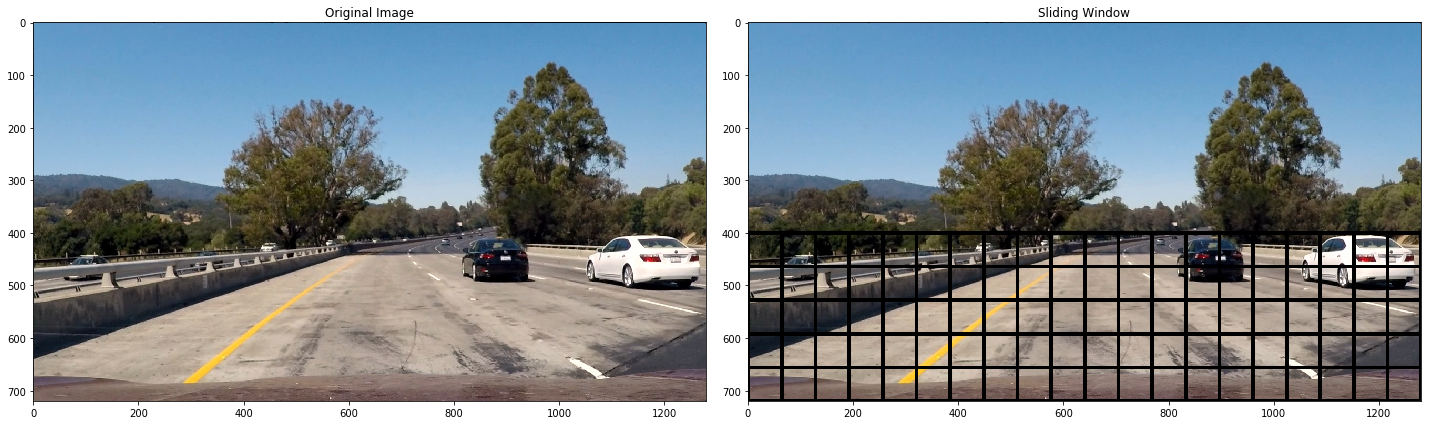

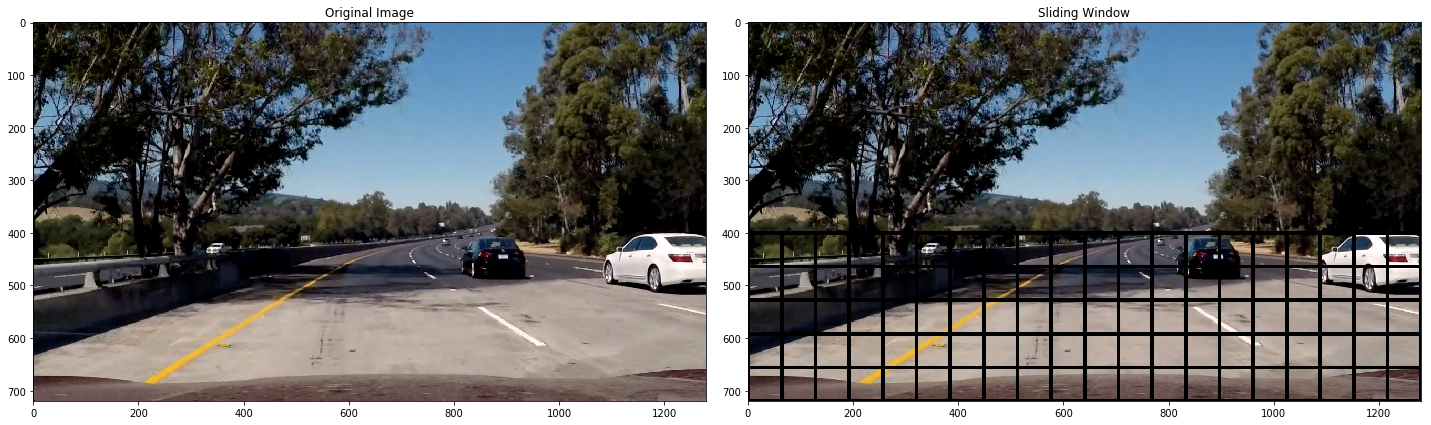

In [30]:
test_images = glob.glob('test_images/*.png')

for window_test_img in test_images:
    slid_win_test_img = mpimg.imread(window_test_img)

    windows = slide_window(slid_win_test_img, x_start_stop=(0, slid_win_test_img.shape[1]), 
                           y_start_stop=(400, slid_win_test_img.shape[0]), 
                            xy_window=(128, 128), xy_overlap=(0.5, 0.5))

    window_img = draw_boxes(slid_win_test_img, windows, color=(0, 0, 255), thick=6) 
    
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(slid_win_test_img)
    ax1.set_title('Original Image')
    ax2.imshow(window_img)
    ax2.set_title('Sliding Window')
plt.show()

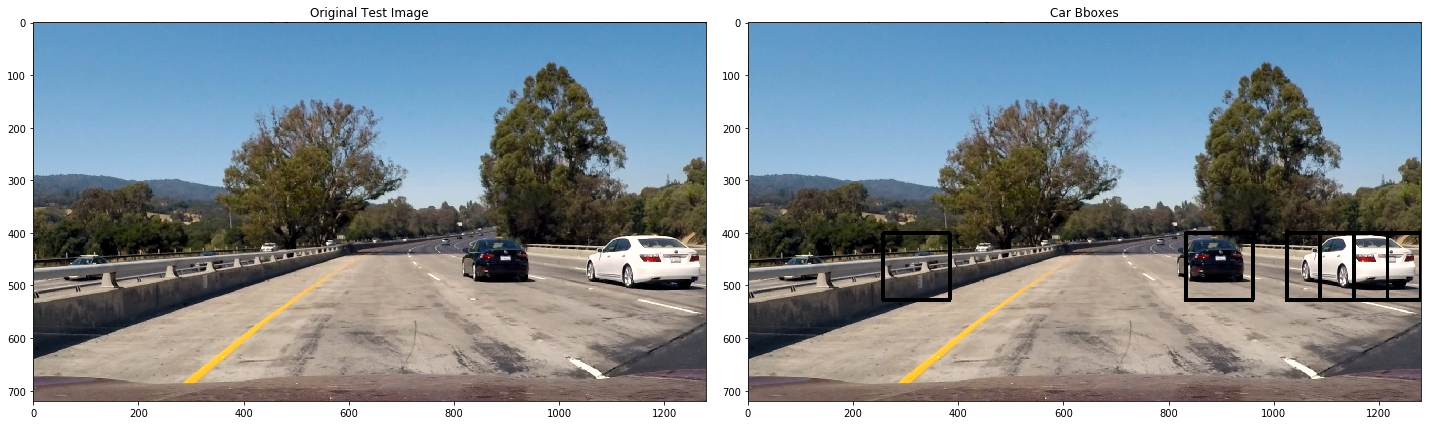

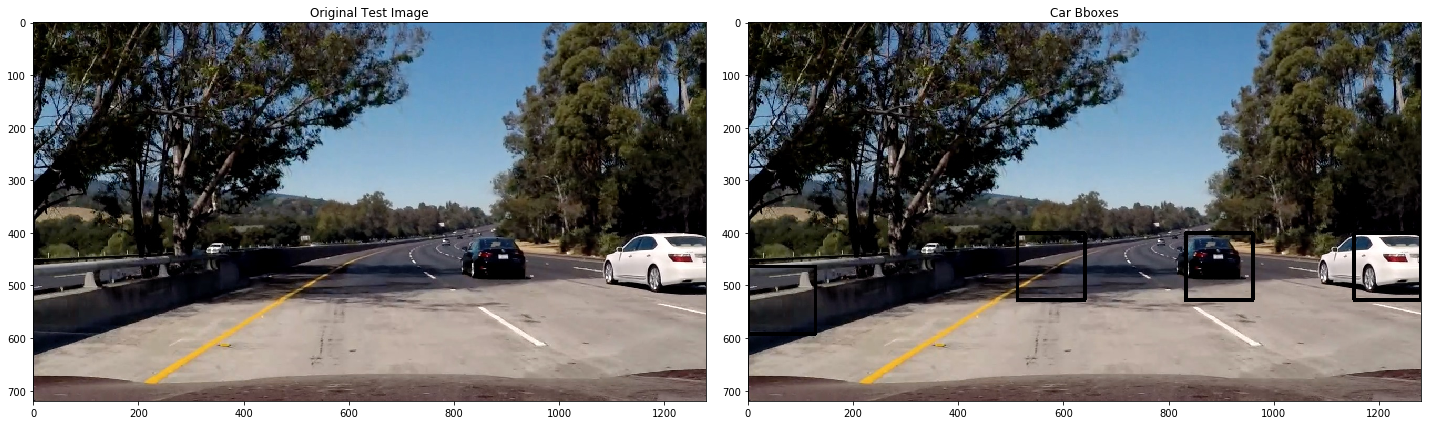

In [50]:
test_images = glob.glob('test_images/*.png')
hog_features_lists ={}
hog_features_lists ['hog_channels'] = 'ALL'
hog_features_lists ['orient'] = 11
hog_features_lists ['pixels_per_cell'] = 8
hog_features_lists ['cells_per_block'] = 2

for idx, test_image in enumerate(test_images):

    search_window_test_img = mpimg.imread(test_image)
    draw_img = np.copy(search_window_test_img)
    wind = slide_window(draw_img, x_start_stop=(0, search_window_test_img.shape[1]), 
                       y_start_stop=(400, search_window_test_img.shape[0]), 
                        xy_window=(128, 128), xy_overlap=(0.5, 0.5))

    hot_windows = hot_windows = search_windows(draw_img, wind, class_hogbin_feat, scaler_hogbin_feat,
                                colorspace='BGR2YCrCb',
                                bin_spatial_feat = True,
                                color_hist_feat = False,
                                hog_feature= True,
                                hog_features_lists=hog_features_lists)
    hot_window_img = draw_boxes(draw_img, hot_windows, color=(0, 0, 255), thick=6)
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(search_window_test_img)
    ax1.set_title('Original Test Image')
    ax2.imshow(hot_window_img)
    ax2.set_title('Car Bboxes')
    file_name = 'submission_images/search_window_output_'+ str(idx) +'.png'
    plt.savefig(file_name,bbox_inches='tight')
plt.show()

# Optimized extraction of features using find_cars()

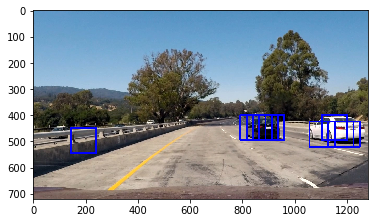

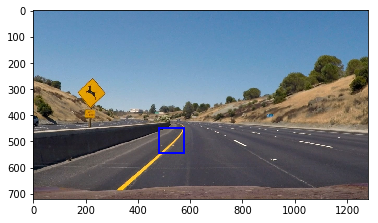

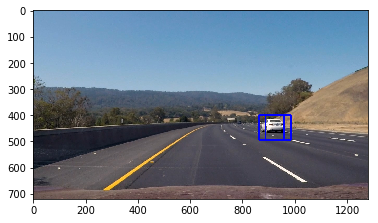

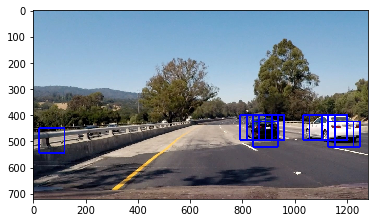

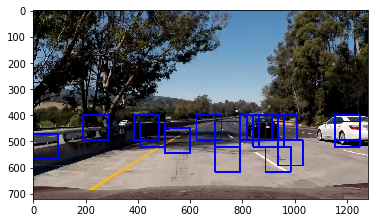

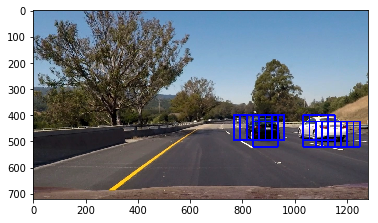

In [51]:
test_images = glob.glob('test_images/*.jpg')

for idx, test_img in enumerate(test_images):
    opt_image = cv2.imread(test_img)
    opt_image = cv2.cvtColor(opt_image, cv2.COLOR_BGR2RGB)
    out_img = find_cars(opt_image, ystart=400, ystop=656, 
                      scale=1.5, svc=class_all_feat_rgb, 
                        scaler_obj=scaler_all_feat_rgb, 
                        orient=11, 
                      pix_per_cell=8, 
                      cell_per_block=2, spatial_size=(32,32), hist_bins=32)
    plt.imshow(out_img)
    file_name = 'submission_images/find_car_output_image_'+ str(idx) +'.png'
    plt.savefig(file_name,bbox_inches='tight')
    plt.show()

In [280]:
#Improve the bounding box accuracry by applying heatmap and threshold

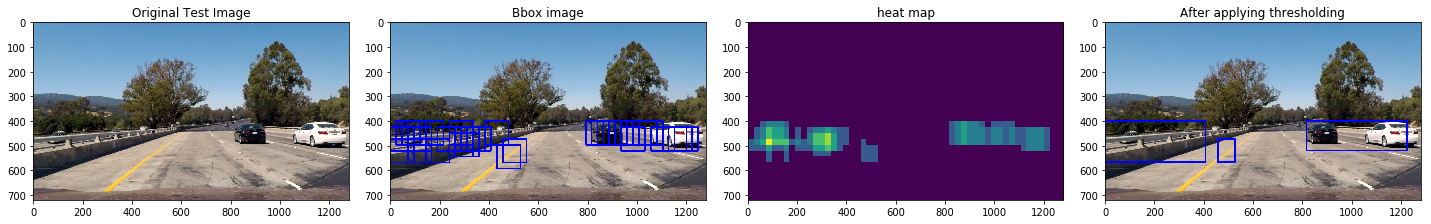

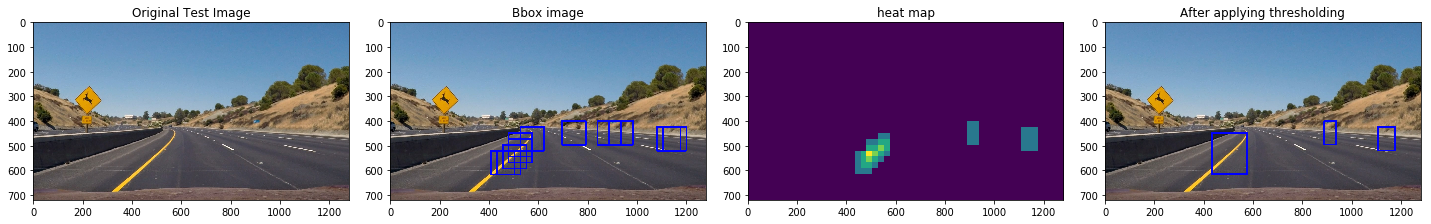

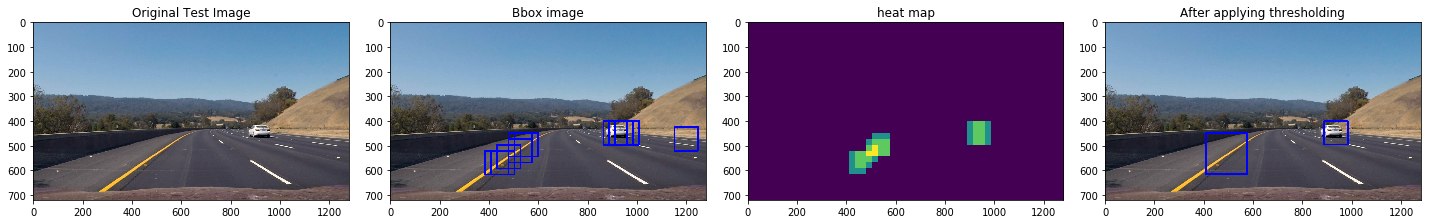

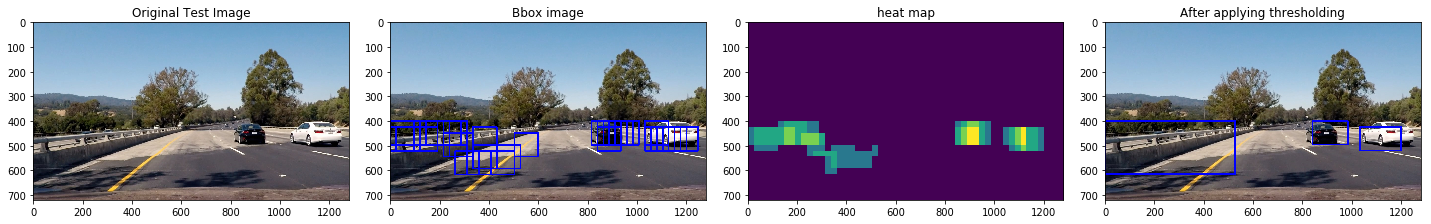

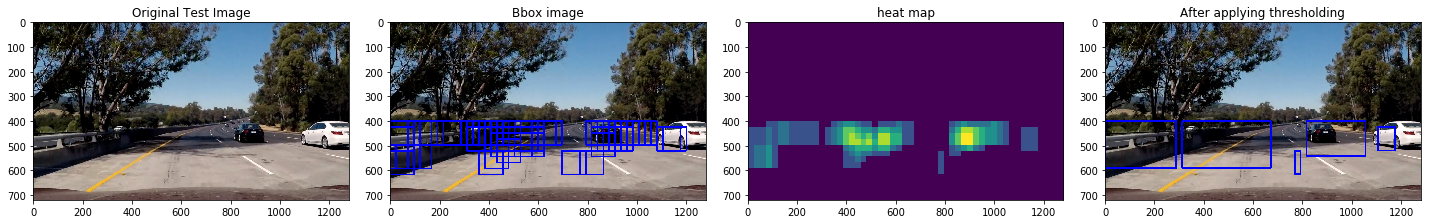

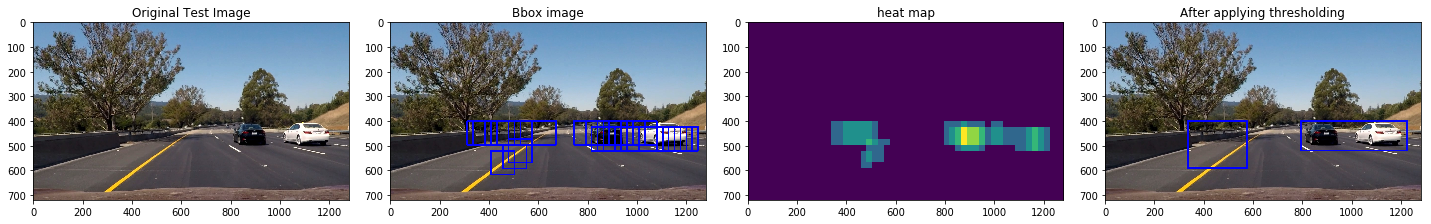

In [293]:
test_images = glob.glob('test_images/*.jpg')

for idx, test_img in enumerate(test_images):
    img = cv2.imread(test_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    box_list = find_cars_bbox(img, ystart=400, ystop=656, 
                              scale=1.5, svc=class_all_feat, 
                            X_scaler=scaler_all_feat, 
                            orient=11,  pix_per_cell=8, 
                           cell_per_block=2, spatial_size=(32,32), hist_bins=32)

    out_img = find_cars(img, ystart=400, ystop=656, 
                          scale=1.5, svc=class_all_feat, 
                            scaler_obj=scaler_all_feat, 
                            orient=11, 
                          pix_per_cell=8, 
                          cell_per_block=2, spatial_size=(32,32), hist_bins=32)

    # Add heat to each box in box list
    heat_init= np.zeros_like(img[:,:,0]).astype(np.float)
    heat = add_heat(heat_init,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    from scipy.ndimage.measurements import label
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    f, (ax1,ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Test Image')
    ax2.imshow(out_img)
    ax2.set_title('Bbox image')
    ax3.imshow(heatmap)
    ax3.set_title('heat map')
    ax4.imshow(draw_img)
    ax4.set_title('After applying thresholding')
    file_name = 'submission_images/find_car_false_postives'+ str(idx) +'.png'
    plt.savefig(file_name,bbox_inches='tight')
    plt.show()

# Explore Different search areas to find and remove false positives and recognize true positives.

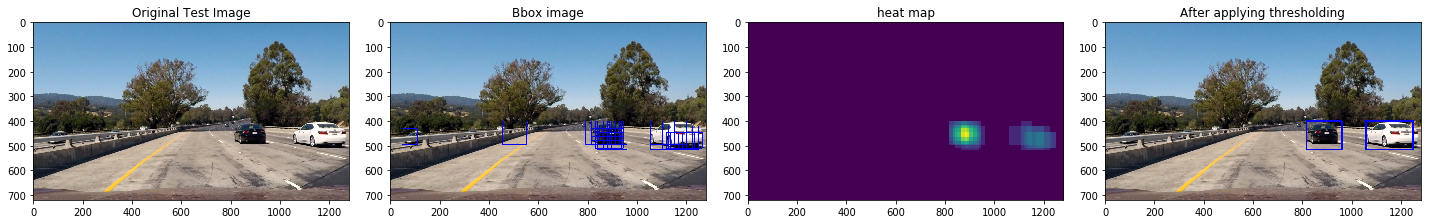

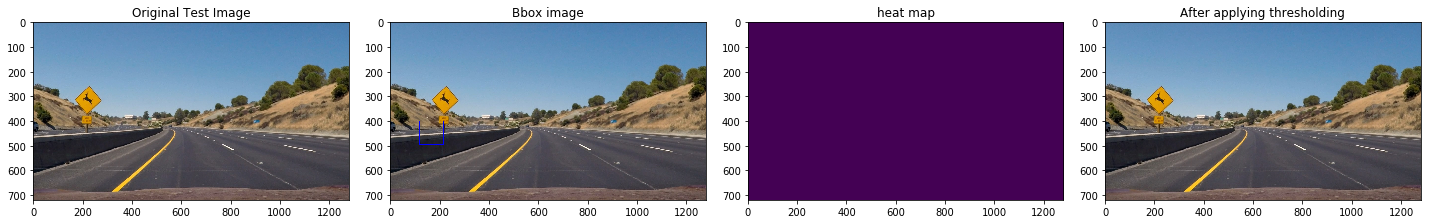

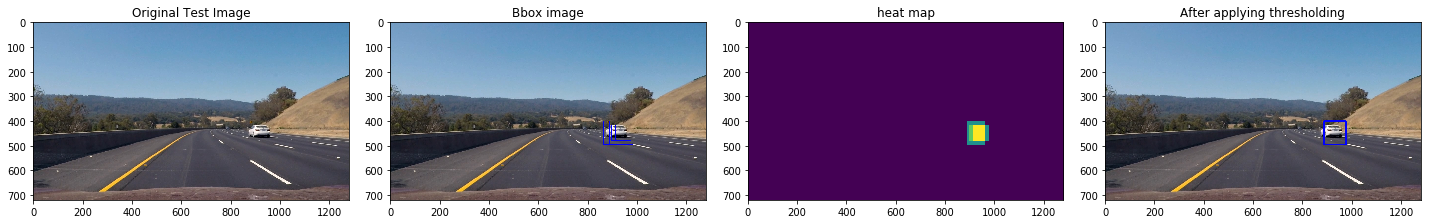

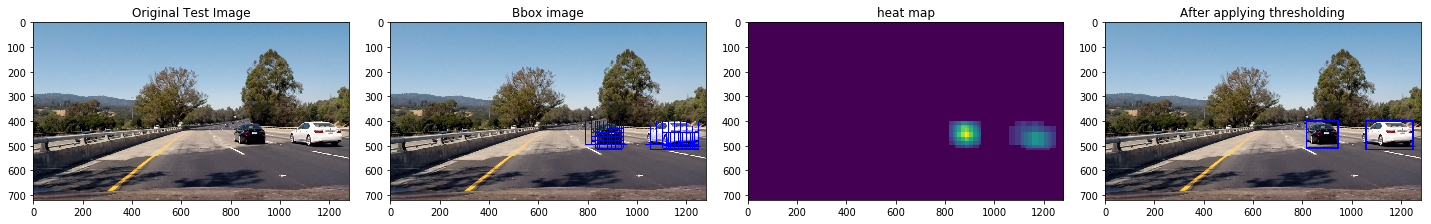

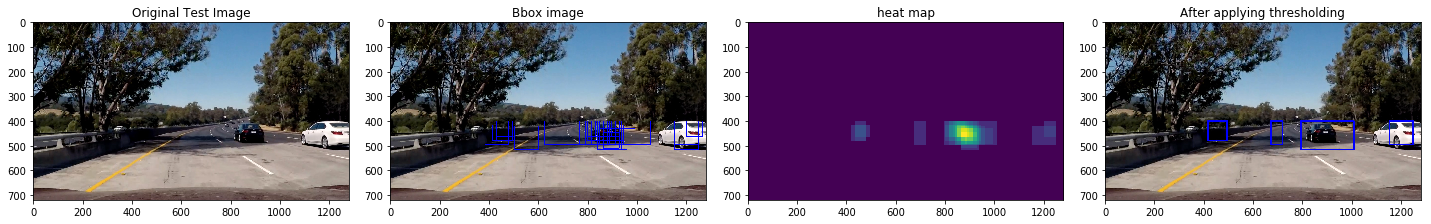

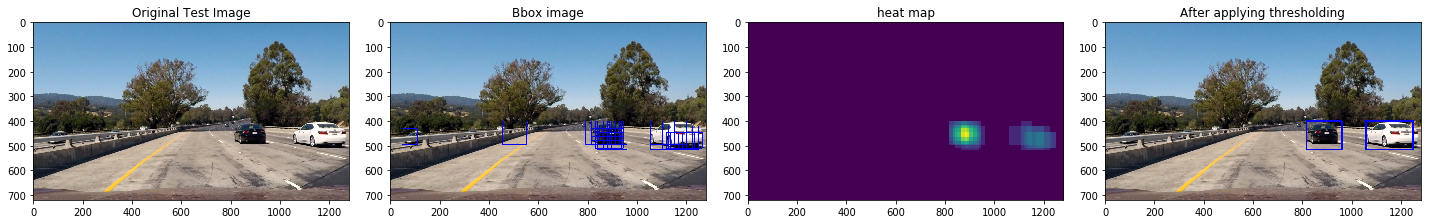

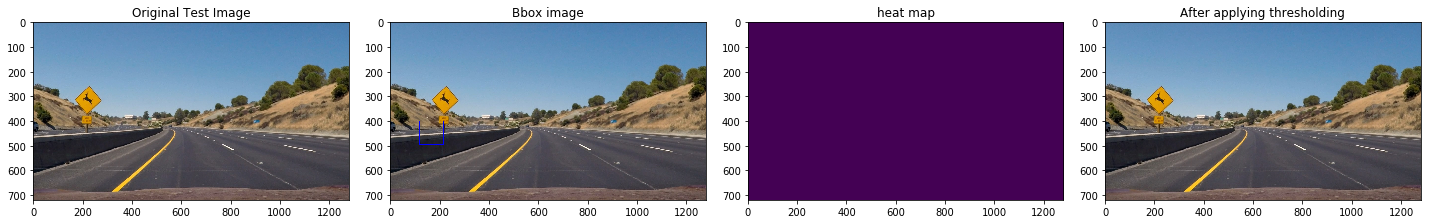

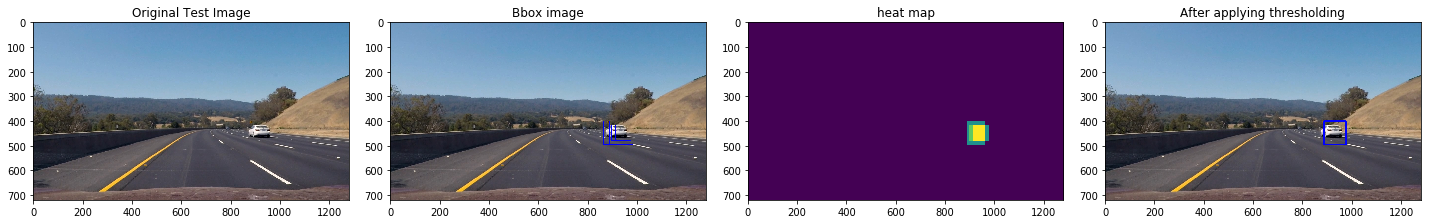

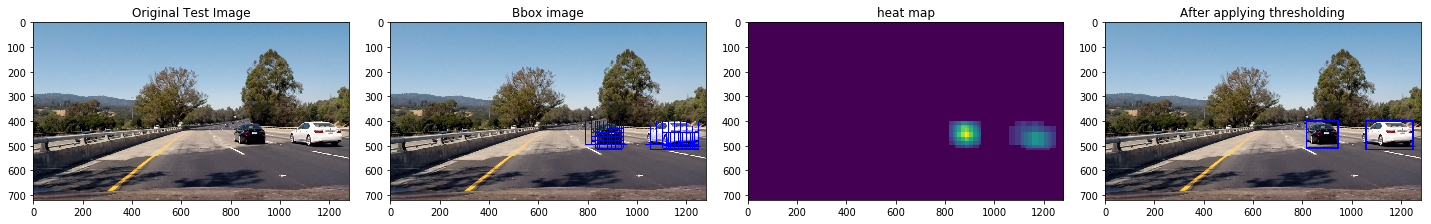

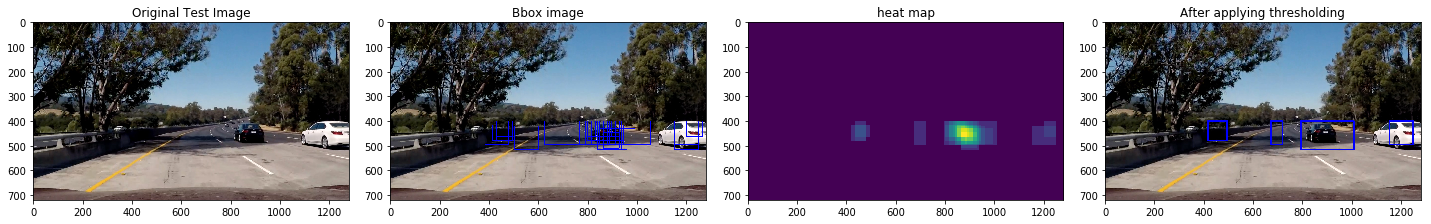

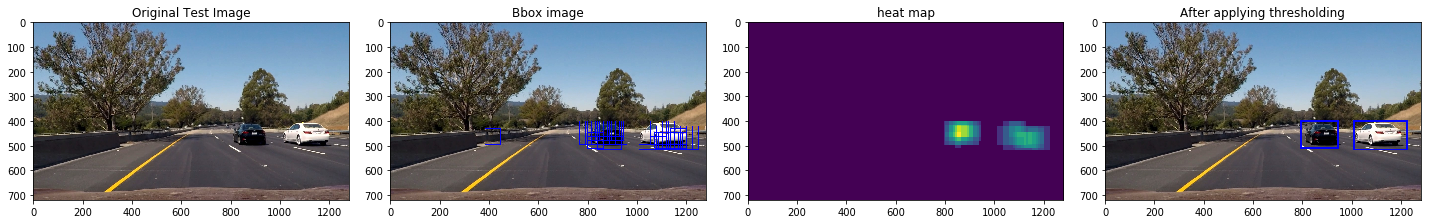

In [457]:
test_images = glob.glob('test_images/*.jpg')

for idx, test_img in enumerate(test_images):
    img = cv2.imread(test_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox_list =[]

    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=500, 
                                      scale=1.0, svc=class_all_feat_rgb, 
                                        X_scaler=scaler_all_feat_rgb, 
                                        orient=11,  pix_per_cell=8, 
                                       cell_per_block=2, spatial_size=(32,32), hist_bins=32))


    bbox_list.append(find_cars_bbox(img, ystart=430, ystop=530, 
                                  scale=1.0, svc=class_all_feat_rgb, 
                                    X_scaler=scaler_all_feat_rgb, 
                                    orient=11,  pix_per_cell=8, 
                                   cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=520, 
                              scale=1.5, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=420, ystop=550, 
                              scale=1.5, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=440, ystop=560, 
                              scale=2.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=460, ystop=580, 
                              scale=2.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))


    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=620, 
                              scale=3.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=440, ystop=660, 
                              scale=3.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    rectangles = [item for sublist in bbox_list for item in sublist] 
    test_img_rects = draw_boxes(img, rectangles, color=(0, 0, 255), thick=2)
    heat_init= np.zeros_like(img[:,:,0]).astype(np.float)
    heat = add_heat(heat_init,rectangles)

    # Apply threshold to help remove false positives
    if len(bbox_list) > 10:
        heat = apply_threshold(heat,10)
    else :
        heat = apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    from scipy.ndimage.measurements import label
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    f, (ax1,ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Test Image')
    ax2.imshow(test_img_rects)
    ax2.set_title('Bbox image')
    ax3.imshow(heatmap)
    ax3.set_title('heat map')
    ax4.imshow(draw_img)
    ax4.set_title('After applying thresholding') 
 #   file_name = 'submission_images/find_car_heatmap_scaling_experiment_'+ str(idx) +'.png'
  #  plt.savefig(file_name,bbox_inches='tight')

plt.show()

# Video processing pipeline

In [471]:
class Vehicle_Detect():
    def __init__(self):
        self.cache = deque(maxlen=10)

In [477]:
def process_vid_frm(img):
    
    bbox_list = []
    
    
    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=500, 
                                  scale=1.0, svc=class_all_feat_rgb, 
                                    X_scaler=scaler_all_feat_rgb, 
                                    orient=11,  pix_per_cell=8, 
                                   cell_per_block=2, spatial_size=(32,32), hist_bins=32))


    bbox_list.append(find_cars_bbox(img, ystart=430, ystop=530, 
                                  scale=1.0, svc=class_all_feat_rgb, 
                                    X_scaler=scaler_all_feat_rgb, 
                                    orient=11,  pix_per_cell=8, 
                                   cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=520, 
                              scale=1.5, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=420, ystop=550, 
                              scale=1.5, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=440, ystop=560, 
                              scale=2.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=460, ystop=580, 
                              scale=2.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))


    bbox_list.append(find_cars_bbox(img, ystart=400, ystop=620, 
                              scale=3.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    bbox_list.append(find_cars_bbox(img, ystart=440, ystop=660, 
                              scale=3.0, svc=class_all_feat_rgb, 
                                X_scaler=scaler_all_feat_rgb, 
                                orient=11,  pix_per_cell=8, 
                               cell_per_block=2, spatial_size=(32,32), hist_bins=32))

    heat = np.zeros_like(img[:,:,0]).astype(np.float)

            # Add heat to each box in box list
    for b in bbox_list:
        if (len(b) != 0):
            heat = add_heat(heat,b)
    det.cache.append(heat)
    
    heat = np.sum(det.cache, axis=0)
    heat = apply_threshold(heat,15)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
    labels = label(heatmap)

    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img
    

In [480]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os
det = Vehicle_Detect()
output = 'output_video/vehicleDetection.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_vid_frm) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_video/vehicleDetection.mp4
[MoviePy] Writing video output_video/vehicleDetection.mp4


100%|█████████▉| 1260/1261 [27:19<00:01,  1.27s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/vehicleDetection.mp4 

CPU times: user 25min 13s, sys: 1min 57s, total: 27min 10s
Wall time: 27min 20s


In [481]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))